In [193]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import datasets
from statsmodels.api import Logit, MNLogit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt

# The first dataset

In [2]:
dataSet = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)
dataSet

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [32]:
X = dataSet.iloc[:,:3]
y = 2- dataSet.iloc[:,3]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

model = LogisticRegression(C=100,
                           tol=1e-1,
                           penalty='l2',
                           solver='newton-cg',
                           fit_intercept=False,
                           max_iter=8500)
result = model.fit(X_train,y_train)

predicted = model.predict(X_test)
real = y_test

print(accuracy_score(predicted,y_test))
confusion_matrix(real,predicted)

0.7272727272727273


array([[ 2, 20],
       [ 1, 54]])

0.7922077922077922

# The second dataset

The dataset comes from [Kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [33]:
df2 = pd.read_csv('./data/heart.csv')
df2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
X = df2.iloc[:,0:13]
y = df2.iloc[:,13]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

model2 = LogisticRegression(max_iter=8500,solver='saga')

model2.fit(X_train,y_train)

predicted = model2.predict(X_test)
print(accuracy_score(predicted,y_test))
confusion_matrix(predicted,y_test)

0.8421052631578947


array([[27,  2],
       [10, 37]])

# The third dataset

In [35]:
df3 = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',header=None)
df3

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,:8],df3.iloc[:,8])
model = LogisticRegression(C=0.1,
                           max_iter=20000,
                           penalty='l2',
                           solver='newton-cg')
model.fit(X_train,y_train)
predicted = model.predict(X_test)
real = y_test
print(accuracy_score(real,predicted))
confusion_matrix(real,predicted)

0.8229166666666666


array([[109,  15],
       [ 19,  49]])

# The fourth dataset

In [185]:
raw = datasets.load_iris()
X = raw['data']
y = raw['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

model4 = LogisticRegression(multi_class='multinomial',max_iter=10000,solver='sag')
model4.fit(X_train,y_train)

predicted = model4.predict(X_test)
print(accuracy_score(predicted,y_test))
print(confusion_matrix(predicted,y_test))

0.9733333333333334
[[26  0  0]
 [ 0 27  1]
 [ 0  1 20]]


# Fifth Dataset

In [187]:
df5 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None)

X = df5.iloc[:,1:8]
y = df5.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [188]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

0.24147933284989123


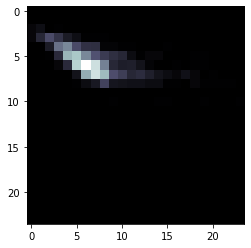

In [192]:
model5 = LogisticRegression(multi_class='multinomial',max_iter=1500,solver='saga')
model5.fit(X_train,y_train)
predicted = model5.predict(X_test)
print(accuracy_score(predicted,y_test))
plt.imshow(confusion_matrix(predicted,y_test),cmap='bone')

In [197]:
le = LabelBinarizer()
nls = le.fit_transform(y)
nls.shape

(4177, 28)

In [241]:
m = 12
X_train, X_test, y_train, y_test = train_test_split(X,nls,test_size=0.5)
model = LogisticRegression()
model.fit(X_train,y_train[:,m])
predicted = model.predict(X_test)
print(accuracy_score(predicted,y_test[:,m]))
real = y_test[:,m]
confusion_matrix(real, predicted)

0.9526089037817137


array([[1990,    0],
       [  99,    0]])

# The sixth dataset

In [242]:
df0 = datasets.fetch_20newsgroups_vectorized()

In [243]:
np.unique(df0['target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [244]:
X = df0['data']
y = df0['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model0 = LogisticRegression(multi_class='multinomial',max_iter=1500,solver='saga')
model0.fit(X_train,y_train)

LogisticRegression(max_iter=1500, multi_class='multinomial', solver='saga')

In [245]:
predicted = model0.predict(X_test)
accuracy_score(predicted,y_test)

0.8024745912505523

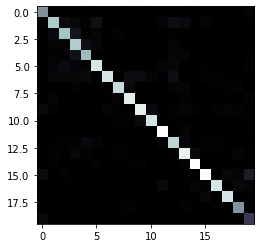

In [246]:
plt.imshow(confusion_matrix(predicted,y_test),cmap='bone')

In [248]:
confusion_matrix(predicted,y_test)[:10,:10]

array([[ 64,   0,   0,   0,   1,   0,   0,   0,   1,   1],
       [  2,  86,   6,   4,   2,   8,   1,   0,   1,   1],
       [  0,   5,  83,  10,   1,   3,   1,   2,   0,   0],
       [  0,   3,   3,  87,   7,   3,   1,   0,   1,   1],
       [  1,   2,   2,   9,  80,   1,   0,   0,   1,   0],
       [  0,   3,   6,   3,   2,  99,   0,   1,   0,   1],
       [  0,   4,   4,   4,   5,   1,  98,   1,   6,   6],
       [  1,   0,   0,   2,   1,   0,   2,  94,   5,   0],
       [  1,   3,   0,   0,   1,   1,   1,   3, 103,   1],
       [  5,   2,   0,   0,   0,   1,   3,   1,   0, 104]])